In [23]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import scipy
%config IPCompleter.greedy=True

### Requirement:
We have the dataset **titanic3.csv**. This dataset contains information about customer on Titanic ship. Here is step need to be done:
1. Read dataset. One of the important info to predict a customer is die or live are 'age' and 'fare'. 
we need to check these two columns, if there is NULL on row, drop NULL row, then do basic analysis and visualize them.
2. In order to improve the accuracy, we need to check and standardize data. Choose which method to standardize and visualize them after.

In [24]:
dataset = pd.read_csv("data/titanic3.csv")

In [25]:
dataset.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [27]:
dataset_age_fare = dataset[['age', 'fare']]
dataset_age_fare.head()

,age,fare
0,29.0000,211.3375
1,0.9167,151.5500
2,2.0000,151.5500
3,30.0000,151.5500
4,25.0000,151.5500


In [28]:
dataset_age_fare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 2 columns):
age     1046 non-null float64
fare    1308 non-null float64
dtypes: float64(2)
memory usage: 20.5 KB


### We remove NULL row value of 'age' and 'fare' columns

In [29]:
dataset_age_fare = dataset_age_fare.dropna()
#dataset_age_fare = pd.DataFrame({'age': dataset_age_fare.age.dropna(), 'fare': dataset_age_fare.fare})

In [30]:
dataset_age_fare.head()

,age,fare
0,29.0000,211.3375
1,0.9167,151.5500
2,2.0000,151.5500
3,30.0000,151.5500
4,25.0000,151.5500


In [31]:
dataset_age_fare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 2 columns):
age     1045 non-null float64
fare    1045 non-null float64
dtypes: float64(2)
memory usage: 24.5 KB


In [32]:
def continous_analysis(data, col):
    colSer = data[col]
    mean = colSer.mean()
    mode = colSer.mode()
    median = colSer.median()
    std = colSer.std()
    skew = colSer.skew()
    kurtois = colSer.kurtosis()
    print("==============================")
    print(col, "Mean:", mean)
    print(col, "Mode:", mode.values)
    print(col, "Median:", median)
    print(col, "Std:", std)
    print(col, "Skew:", skew)
    print(col, "Kurtois:", kurtois)
    print("\n")

In [33]:
for col in dataset_age_fare.columns:
    continous_analysis(dataset_age_fare, col)

age Mean: 29.851834162679427
age Mode: [24.]
age Median: 28.0
age Std: 14.389200976290613
age Skew: 0.4070076804557531
age Kurtois: 0.15492240464055795


fare Mean: 36.68608028708134
fare Mode: [13.]
fare Median: 15.75
fare Std: 55.732533181377356
fare Skew: 4.115701142718966
fare Kurtois: 23.656458102277497




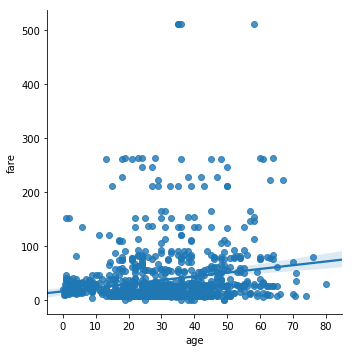

In [34]:
sb.lmplot(x = "age", y = "fare", data = dataset_age_fare)

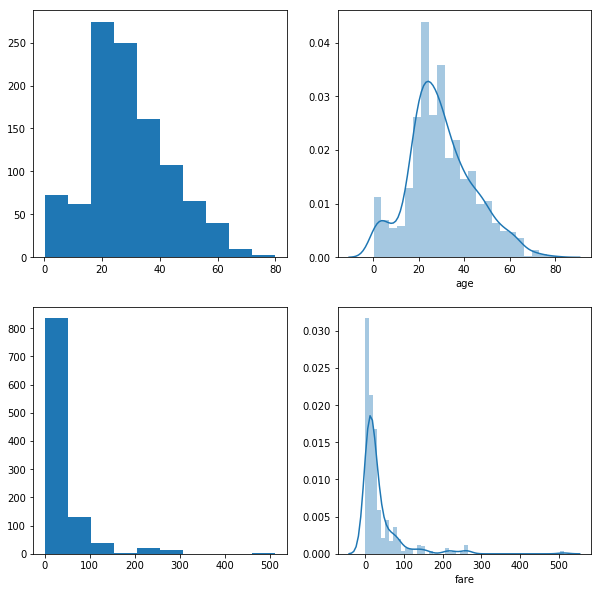

In [35]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.hist(dataset_age_fare.age)
plt.subplot(2,2,2)
sb.distplot(dataset_age_fare.age)
plt.subplot(2,2,3)
plt.hist(dataset_age_fare.fare)
plt.subplot(2,2,4)
sb.distplot(dataset_age_fare.fare)

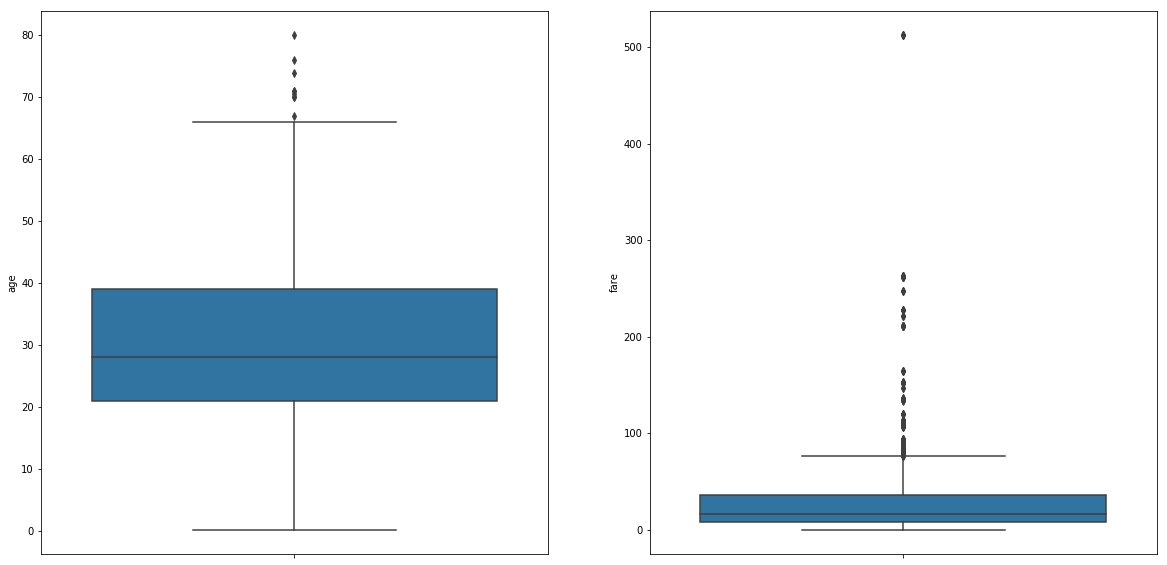

In [36]:

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sb.boxplot(dataset_age_fare.age,orient="v")
plt.subplot(1,2,2)
sb.boxplot(dataset_age_fare.fare,orient="v")

### Base on analysis above, we see the dataset is on different scales, has outlier and does not normal distribution. Therefore, we apply Robustscaler to standardize data¶

In [37]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
scale_data = scaler.fit_transform(dataset_age_fare)

In [38]:
scale_age_fare = pd.DataFrame(scale_data, columns=["age", "fare"])

In [39]:
scale_age_fare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 2 columns):
age     1045 non-null float64
fare    1045 non-null float64
dtypes: float64(2)
memory usage: 16.4 KB


In [40]:
scale_age_fare.head()

,age,fare
0,0.055556,7.125228
1,-1.504628,4.947177
2,-1.444444,4.947177
3,0.111111,4.947177
4,-0.166667,4.947177


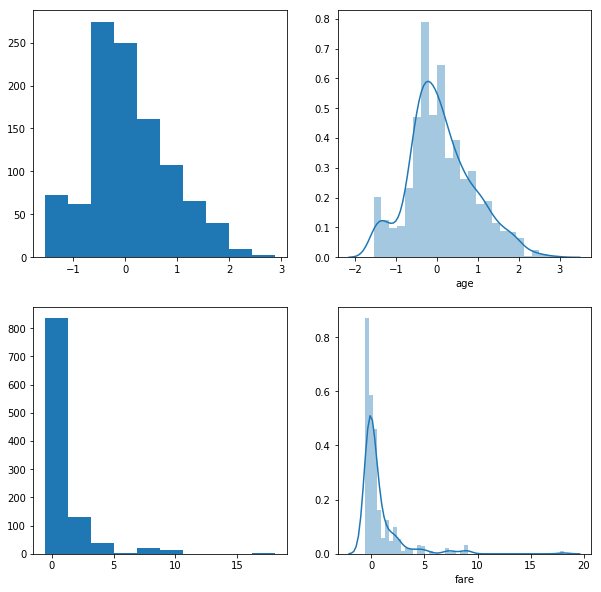

In [41]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.hist(scale_age_fare.age)
plt.subplot(2,2,2)
sb.distplot(scale_age_fare.age)
plt.subplot(2,2,3)
plt.hist(scale_age_fare.fare)
plt.subplot(2,2,4)
sb.distplot(scale_age_fare.fare)

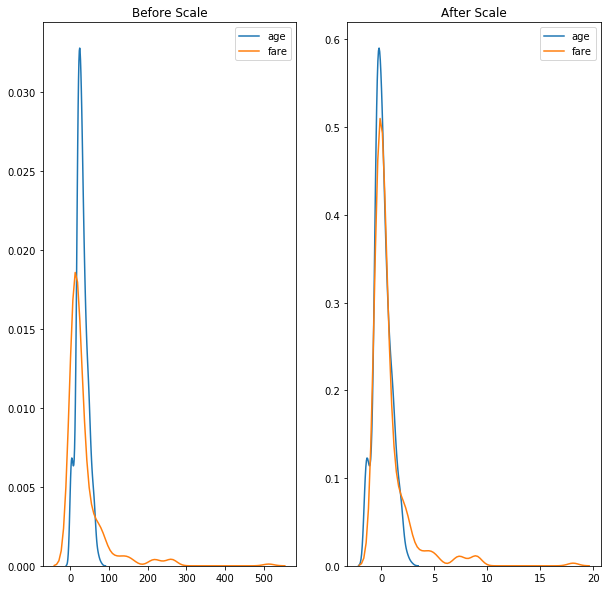

In [42]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sb.kdeplot(dataset_age_fare.age)
sb.kdeplot(dataset_age_fare.fare)
plt.title("Before Scale")
plt.subplot(1,2,2)
plt.title("After Scale")
sb.kdeplot(scale_age_fare.age)
sb.kdeplot(scale_age_fare.fare)
